# Logistic Regression with a Neural Network mindset

## Explanation

### Logistic Regression

$$
\begin{aligned}
&y|x \sim Binom(1, \hat{y}), \hat{y} =\sigma(\omega^Tx+b)\\
\Rightarrow &\Pr(y|x)=\hat{y}^y(1-\hat{y})^{1-y}=\begin{cases}
1-\hat{y}, &y=0\newline
\hat{y}, &y=1
\end{cases}\\
\Rightarrow &\log\Pr(y|x)=y\log\hat{y}+(1-y)\log(1-\hat{y})=-L(\hat{y},y)
\end{aligned}
$$

Goal: maximize $\Pr(y|x)$ w.r.t $(\omega,b)$ $\Leftrightarrow$ minimize $L(\hat{y},y)$ w.r.t $(\omega,b)$

Optimization: **gradient descent method**

Notations:

- $L(a,y) = -y\log a - (1-y)\log(1-a)$
- $a = \sigma(z)=\frac{1}{1+e^{-z}}$
- $z=\omega^Tx+b$
- $x,\omega \in \mathbb{R}^{n\times 1}, b\in \mathbb{R}, y\in\{0,1\}$

Compute Grads (**Back Propagation**):

$$
\frac{\partial L}{\partial \omega_i}=\frac{d L}{d a}\frac{d a}{d z}\frac{\partial z}{\partial \omega_i}\\
\frac{\partial L}{\partial b}=\frac{d L}{da}\frac{d a}{d z}\frac{\partial z}{\partial b}
$$

- $\frac{d L}{d a}=-\frac{y}{a}+\frac{1-y}{1-a}$
- $\frac{d a}{d z}=\frac{e^{-z}}{(1+e^{-z})^2}=a(1-a)$
- $\frac{d L}{d a}\frac{d a}{d z}=a-y$
- $\frac{\partial z}{\partial \omega_i} = x_i$
- $\frac{\partial z}{\partial b}=1$

$$
\Rightarrow \frac{\partial L}{\partial \omega_i} = (a-y)x_i,\ \ 
\frac{\partial L}{\partial b} = a-y\\
\Rightarrow \frac{\partial L}{\partial \omega} = (a-y)x
$$


--------------

- training set: $\{(x^{(i)}, y^{(i)}\}_{i=1}^m$
- design matrix:
$$
X = (x^{(1)},x^{(2)},\ldots,x^{(m)}) \in\mathbb{R}^{n\times m}
$$
- label vector:
$$
Y = (y^{(1)},y^{(2)},\ldots,y^{(m)}) \in\mathbb{R}^{1\times m}
$$

- activation values:
$$
A = (\hat{y}^{(1)},\hat{y}^{(2)},\ldots,\hat{y}^{(m)}) \in\mathbb{R}^{1\times m}
$$
- cost (or **loss**):
$$
J(\omega,b)=\frac{1}{m}\sum_{i=1}^m L\left(\hat{y}^{(i)},y^{(i)}\right)
$$
- minimize $J(\omega,b)$ w.r.t. $(\omega,b)$ $\Leftrightarrow$ maximize $\prod_{i=1}^m \Pr\left(y^{(i)}\Big|x^{(i)}\right)$ w.r.t. $(\omega,b)$

- Compute Grads (**Back Propagation**):
$$
\frac{\partial J}{\partial \omega}= 
\frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial\omega}L\left(\hat{y}^{(i)},y^{(i)}\right)
=\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})x^{(i)}
=\frac{1}{m}X(A-Y)^T
$$

$$
\frac{\partial J}{\partial b}= 
\frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial b}L\left(\hat{y}^{(i)},y^{(i)}\right)
=\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})
=\frac{1}{m}\mathbb{1}_{1\times m}(A-Y)^T
$$

-----------------

```python
dZ = A - Y 
dw = np.dot(X, dZ.T)/m
db = np.mean(dZ)
```







## Project. Image Classification (cat/noncat)

<img src="https://raw.githubusercontent.com/augustrobo/Neural-Networks-and-Deep-Learning/master/01-Logistic-Regression-with-a-Neural-Network-mindset/images/LogReg_kiank.png" style="width:650px;height:400px;">

### 1. Packages

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from skimage.transform import resize
from lr_utils import load_dataset

%matplotlib inline

### 2. Load Datasets

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print("{}{}".format("train_set_x_orig shape: ", train_set_x_orig.shape))
print("{}{}".format("train_set_y shape: ", train_set_y.shape))
print("{}{}".format("test_set_x_orig shape: ", test_set_x_orig.shape))
print("{}{}".format("test_set_y shape: ", test_set_y.shape))

print ('\n' + "-------------------------------------------------------" + '\n')

print("{}{}".format("Number of training examples: ", m_train))
print("{}{}".format("Number of test examples: ", m_test))

print ('\n' + "-------------------------------------------------------" + '\n')

print("{}{}".format("Height/Width of each image: ", num_px))
print("{0}({1}, {1}, {2})".format("Each image is of size: ", num_px, 3))

train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)

-------------------------------------------------------

Number of training examples: 209
Number of test examples: 50

-------------------------------------------------------

Height/Width of each image: 64
Each image is of size: (64, 64, 3)


#### View images

y = [1], it's a 'cat' picture


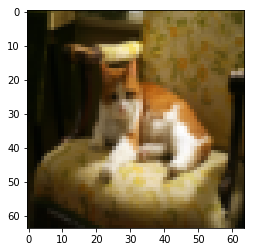

In [5]:
# Example of a picture
index = 7
plt.imshow(train_set_x_orig[index])


print("y = {0}, it's a '{1}' picture".format(train_set_y[:, index],
                                          classes[np.squeeze(train_set_y[:, index])].decode("utf-8")))

### 3. Preprocessing Step

#### Flatten Training and Test Datasets

In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("{}{}".format("train_set_x_flatten shape: ", train_set_x_flatten.shape))
print("{}{}".format("test_set_x_flatten shape: ", test_set_x_flatten.shape))

train_set_x_flatten shape: (12288, 209)
test_set_x_flatten shape: (12288, 50)


#### Standardize the Datasets

In [7]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

### 4. Building Blocks

- Helper functions
- Initialization of params
- Loops:
    - Forward Propagation: compute loss
    - Backward Propagation: compute gradient
    - Gradient Descent: update params
- Make Predictions

----------------

#### Sigmoid function

In [8]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    return 1/(1 + np.exp(-z))    

#### Initialization of Parameters

In [9]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim, 1))
    b = 0.0  
    return w, b

#### Forward and Backward Propagation

In [10]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b) # compute activation
    cost = - np.mean(np.log(A) * Y +  np.log(1 - A) *(1 - Y)) # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dZ = A - Y
    dw = np.dot(X, dZ.T)/m
    db = np.mean(dZ)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

#### Optimization by Gradient Descent

In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

#### Make Predictions

In [12]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction[0] = np.where(A[0] <= 0.5, 0, 1) 
    
    return Y_prediction

### 5. Merge All Functions Into a Model

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

#### Train the model

In [14]:
d = model(train_set_x, 
          train_set_y, 
          test_set_x, 
          test_set_y, 
          num_iterations = 2000, 
          learning_rate = 0.005, 
          print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


#### Plot Cost Function *vs* No. of Iterations

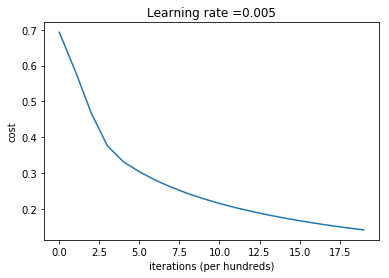

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

#### Choice of Learning Rate

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



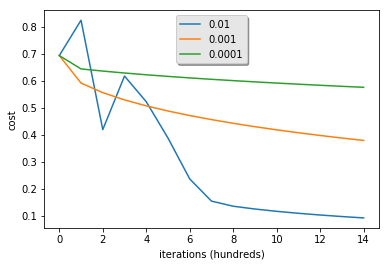

In [16]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#### Test with Your Own Image

y = 1.0, predicts a 'cat' picture


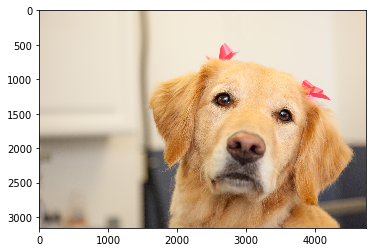

In [17]:
my_image = "Dog-grooming.jpg" 

# preprocess the image to fit algorithm.
fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = resize(image, 
                  output_shape = (num_px, num_px),
                  mode = 'constant').reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
mylabel = np.squeeze(my_predicted_image)
myclass = classes[int(np.squeeze(my_predicted_image)),].decode("utf-8")
print("y = {0}, predicts a '{1}' picture".format(mylabel, myclass))